In [10]:
!pip install matplotlib deap

In [11]:
#Required Libraries
import random
import matplotlib.pyplot as plt
from deap import base, creator, tools, algorithms
import math
import numpy as np

In [12]:
num_locations = 20
locations = [(random.randint(1,100),random.randint(1,100)) for _ in range(num_locations)]
depot = (50,50)
num_vehicles = 3

In [13]:
#Defining the fitness and solution class
creator.create("FitnessMin", base.Fitness, weights=(-1.0,-1.0))
creator.create("Individual", list, fitness=creator.FitnessMin)

/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


In [14]:
toolbox = base.Toolbox()
toolbox.register("indices", random.sample, range(num_locations), num_locations)
toolbox.register("individual",tools.initIterate,creator.Individual,toolbox.indices)
toolbox.register("population", tools.initRepeat,list,toolbox.individual)

In [15]:
# Fitness function
def evalVRP(individual):
    total_distance = 0
    distances = []
    for i in range(num_vehicles):
        vehicle_route = [depot] + [locations[individual[j]] for j in range(i, len(individual), num_vehicles)] + [depot]
        vehicle_distance = sum(np.linalg.norm(np.array(vehicle_route[k+1]) - np.array(vehicle_route[k])) for k in range(len(vehicle_route)-1))
        total_distance += vehicle_distance
        distances.append(vehicle_distance)
    balance_penalty = np.std(distances)
    return total_distance, balance_penalty

toolbox.register("evaluate", evalVRP)

In [16]:
toolbox.register("mate", tools.cxUniformPartialyMatched,indpb=0.5)
toolbox.register("mutate", tools.mutShuffleIndexes,indpb=0.2)
toolbox.register("select", tools.selTournament,tournsize=3)

In [17]:
# Plotting Function
def plot_routes(individual, title="Routes"):
  vehicle_coordinates = [[] for _ in range(num_vehicles)]
  for coords in vehicle_coordinates:
      coords.append(depot[:])

  for index, coord in enumerate(locations):
      vehicle_id = index % num_vehicles
      vehicle_coordinates[vehicle_id].append(coord)

  for coords in vehicle_coordinates:
      coords.append(depot[:])

  plt.figure(figsize=(10, 6))
  for vehicle_id, coordinates in enumerate(vehicle_coordinates):
      if coordinates:
          x_coords = [coord[0] for coord in coordinates]
          y_coords = [coord[1] for coord in coordinates]
          plt.plot(x_coords, y_coords, marker='o', label=f'Vehicle {vehicle_id + 1}')
  plt.title('Routes taken by Vehicles')
  plt.xlabel('X Coordinates')
  plt.ylabel('Y Coordinates')
  plt.legend()
  plt.grid(True)
  plt.show()

gen	nevals	avg    	min     	std    
0  	300   	543.234	0.269759	498.202
1  	230   	532.772	0.639595	485.379
2  	222   	515.56 	0.639595	471.82 
3  	232   	516.121	0.639595	471.523
4  	243   	517.254	4.61781 	470.932
5  	220   	518.525	4.19272 	471.681
6  	228   	514.873	1.10138 	471.944
7  	229   	513.803	3.5386  	469.577
8  	230   	514.677	3.32682 	470.654
9  	218   	511.027	3.86382 	468.689
10 	234   	517.29 	3.30071 	473.283
11 	218   	516.96 	2.89048 	471.183
12 	225   	518.38 	2.50915 	472.681
13 	239   	517.651	5.09305 	471.705
14 	214   	512.725	3.72596 	469.945
15 	223   	509.715	7.13137 	463.627
16 	218   	511.782	1.36584 	468.415
17 	247   	518.86 	3.29852 	474.539
18 	231   	519.6  	3.23542 	474.571
19 	229   	510.46 	1.35558 	467.31 
20 	244   	518.518	1.35558 	475.884
21 	229   	510.459	1.35558 	465.769
22 	207   	508.055	1.35558 	464.474
23 	241   	516.751	0.332651	471.595
24 	241   	519.989	0.332651	474.658
25 	219   	512.5  	2.98198 	469.176
26 	234   	511.182	2.06191 	

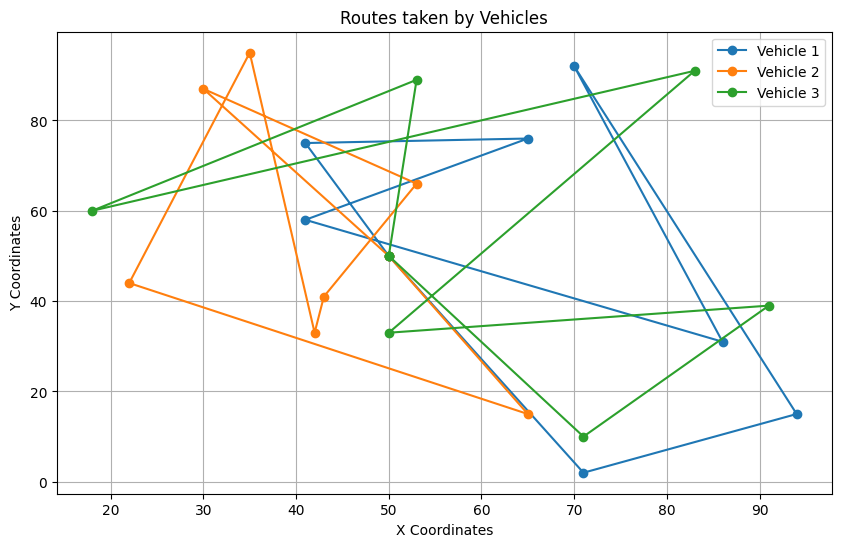

In [18]:
# Running the Genetic Algorithm
def main():
    random.seed(42)
    pop = toolbox.population(n=300)
    hof = tools.HallOfFame(1)

    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("min", np.min)
    stats.register("std", np.std)

    algorithms.eaSimple(pop, toolbox, 0.7, 0.2, 100, stats=stats, halloffame=hof)
    plot_routes(hof[0], "Optimal Route")
    return pop, stats, hof

if __name__ == "__main__":
  main()